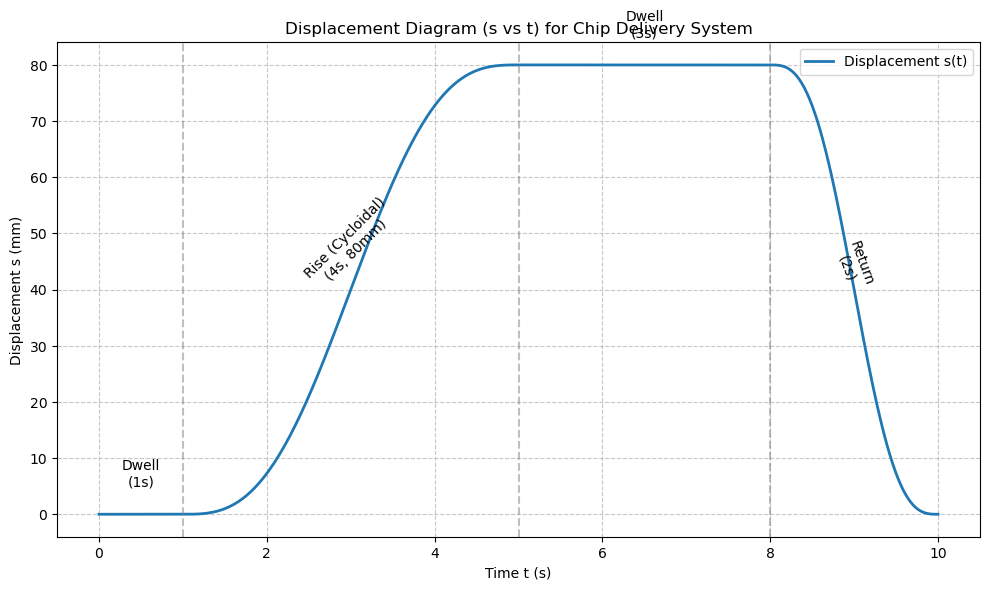

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def cycloidal_rise(t, h, T):
    """
    计算摆线上升运动的位移
    t: 局部时间 (0 到 T)
    h: 总升程
    T: 上升总时间
    """
    theta = 2 * np.pi * t / T
    return h * (t / T - 1 / (2 * np.pi) * np.sin(theta))

def cycloidal_return(t, h, T):
    """
    计算摆线返回运动的位移
    t: 局部时间 (0 到 T)
    h: 总降程 (起始高度)
    T: 返回总时间
    """
    theta = 2 * np.pi * t / T
    return h * (1 - (t / T - 1 / (2 * np.pi) * np.sin(theta)))

def get_displacement(time):
    s = np.zeros_like(time)
    for i, t in enumerate(time):
        if 0 <= t < 1:
            # 第一段: 等待 1s
            s[i] = 0
        elif 1 <= t < 5:
            # 第二段: 4s 内上升 80mm (摆线运动)
            s[i] = cycloidal_rise(t - 1, 80, 4)
        elif 5 <= t < 8:
            # 第三段: 停留 3s
            s[i] = 80
        elif 8 <= t <= 10:
            # 第四段: 2s 内返回原点
            s[i] = cycloidal_return(t - 8, 80, 2)
        else:
            s[i] = 0
    return s

# 创建时间序列
t = np.linspace(0, 10, 1000)
s = get_displacement(t)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t, s, linewidth=2, label='Displacement s(t)')

# 标记各个阶段的分界线
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=8, color='gray', linestyle='--', alpha=0.5)

# 添加文字说明
plt.text(0.5, 5, 'Dwell\n(1s)', ha='center')
plt.text(3, 40, 'Rise (Cycloidal)\n(4s, 80mm)', ha='center', rotation=45)
plt.text(6.5, 85, 'Dwell\n(3s)', ha='center')
plt.text(9, 40, 'Return\n(2s)', ha='center', rotation=-70)

plt.title('Displacement Diagram (s vs t) for Chip Delivery System')
plt.xlabel('Time t (s)')
plt.ylabel('Displacement s (mm)')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# 显示图像
plt.show()